### *Importing the required libraries for EDA*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the dataset file and check head of the dataset

In [2]:
file_path = "C:/Users/D BOSS/Desktop/Datascience/zomato.csv"

zomato_data = pd.read_csv(file_path, encoding = "latin-1")

zomato_data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


## Checking if there are null values

### **From the output of this function, we noticed that cuisines is the only column that have missing values**

In [3]:
missing_values = [missing_values for missing_values in zomato_data.columns if zomato_data[missing_values].isnull().sum()>0]
zomato_data[missing_values].head(3)

,Cuisines
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"


# ***Figuring out how many numbers of missing values are in the cuisiness column and possible other columns***

### ***From the output, there are only nine (9) missing values in the cuisines column***


In [4]:
zomato_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Checking if there are duplicates in the dataset
#### The output shows us that there are no duplicates in the dataset

In [5]:
zomato_data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [6]:
#checking for zomato dataset information
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Checking our zomato dataset columns and other dataset column to see if we can combine them together

In [7]:
zomato_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
##Reading the other dataset

data_path = "C:/Users/D BOSS/Desktop/Datascience/Country-Code.xlsx"
country = pd.read_excel(data_path)
country.head(4)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada


In [9]:
country.columns

Index(['Country Code', 'Country'], dtype='object')

In [10]:
data = pd.merge(zomato_data, country, on = "Country Code" , how="left")
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [11]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Let us checking how many countries are in our data and plotting to see which is greater

In [12]:
Country_numbers = data.Country.value_counts().values
Country_numbers

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

In [13]:
country_index = data.Country.value_counts().index
country_index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

### From the outputs we noticed that india has the biggest number of entries. Our visualization also helped in confirming this when we plotted only 8 of the data points

<BarContainer object of 8 artists>

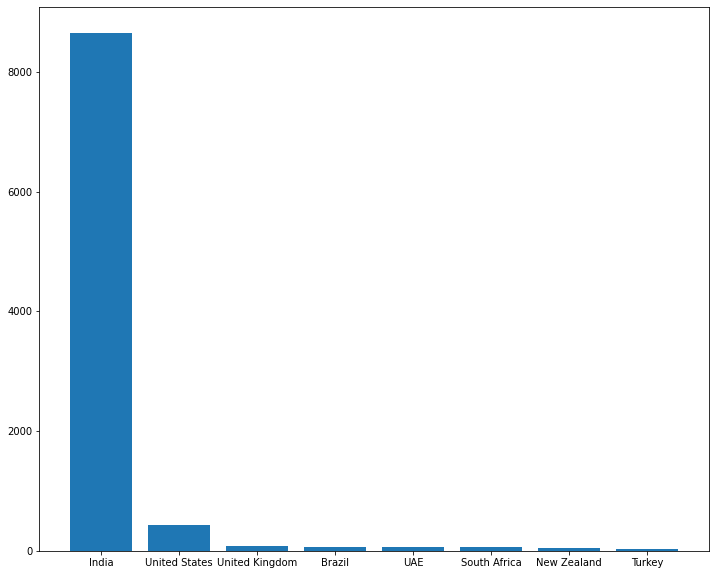

In [14]:
plt.figure(figsize=(12, 10))
plt.bar( country_index[:8], Country_numbers[:8])

### Selecting our categorical varaibles and comparing between them

In [15]:
categoricals = [categoricals for categoricals in data if data[categoricals].dtypes == "object"]
data[categoricals].head(2)

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines


### Selecting our numerical variables

In [16]:
numericals = [numericals for numericals in data if data[numericals].dtypes in ["int32", "float", "int64"] ]
data[numericals] 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,6317637,162,121.027535,14.565443,1100,3,4.8,314
1,6304287,162,121.014101,14.553708,1200,3,4.5,591
2,6300002,162,121.056831,14.581404,4000,4,4.4,270
3,6318506,162,121.056475,14.585318,1500,4,4.9,365
4,6314302,162,121.057508,14.584450,1500,4,4.8,229
...,...,...,...,...,...,...,...,...
9546,5915730,208,28.977392,41.022793,80,3,4.1,788
9547,5908749,208,29.041297,41.009847,105,3,4.2,1034
9548,5915807,208,29.034640,41.055817,170,4,3.7,661
9549,5916112,208,29.036019,41.057979,120,4,4.0,901


In [17]:
data[numericals].dtypes

Restaurant ID             int64
Country Code              int64
Longitude               float64
Latitude                float64
Average Cost for two      int64
Price range               int64
Aggregate rating        float64
Votes                     int64
dtype: object

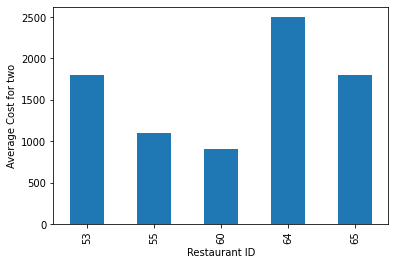

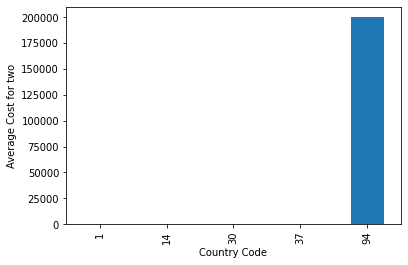

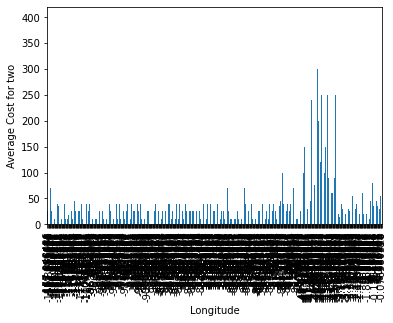

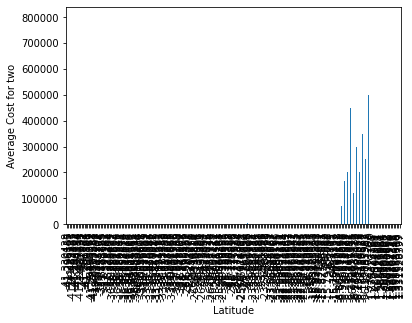

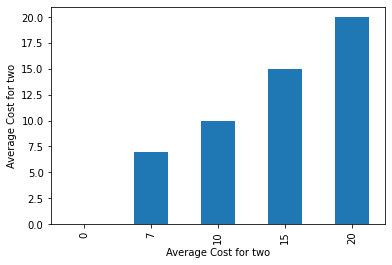

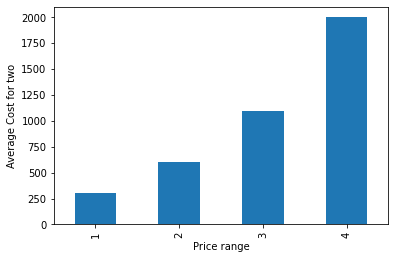

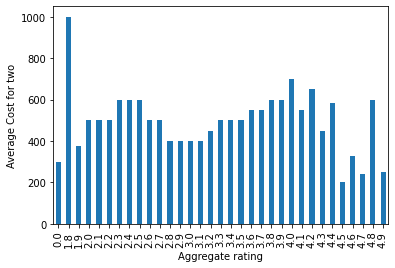

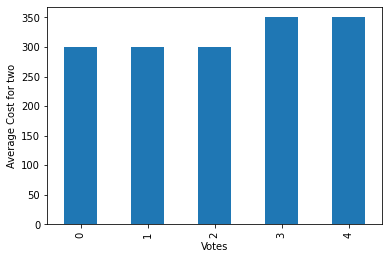

In [28]:
for numbers in data[numericals]:
    data[numericals].groupby(numbers)["Average Cost for two"].median()[:5].plot.bar()
    #plt.figure(figsize=(10, 10))
    plt.xlabel(numbers)
    plt.ylabel("Average Cost for two")
    plt.show()
    

In [53]:
grouped_data = data.groupby(["Aggregate rating", "Rating color", "Rating text"]).size().reset_index().rename(columns ={0:"Rating Count"})
grouped_data.head(4)

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7


### Finding relationship between  Aggregate rating and Rating Count with the help of visualization

* Using matplotli 
* Using seaborn

In [57]:
x = grouped_data["Aggregate rating"].values
x

array([0. , 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,
       3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [56]:
y = grouped_data["Rating Count"].values
y

array([2148,    1,    2,    7,   15,   27,   47,   87,  110,  191,  250,
        315,  381,  468,  519,  522,  483,  498,  480,  458,  427,  400,
        335,  266,  274,  221,  174,  144,   95,   78,   42,   25,   61],
      dtype=int64)

#### From our visualization, we can see that aggregate rating 0 has the biggest number.

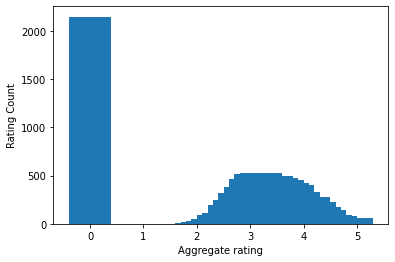

<Figure size 720x720 with 0 Axes>

In [64]:
plt.bar(x, y)
plt.xlabel("Aggregate rating")
plt.ylabel("Rating Count")
plt.figure(figsize=(10,10))
plt.show()

C:\Users\D BOSS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

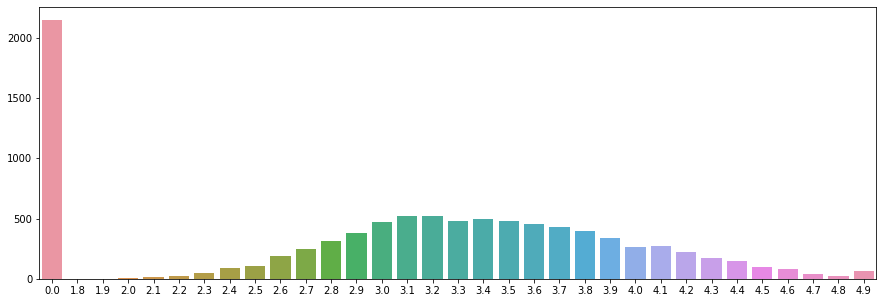

In [72]:
from matplotlib import rcParams

rcParams["figure.figsize"]=(15, 5)
sns.barplot(x, y, data=grouped_data)


C:\Users\D BOSS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

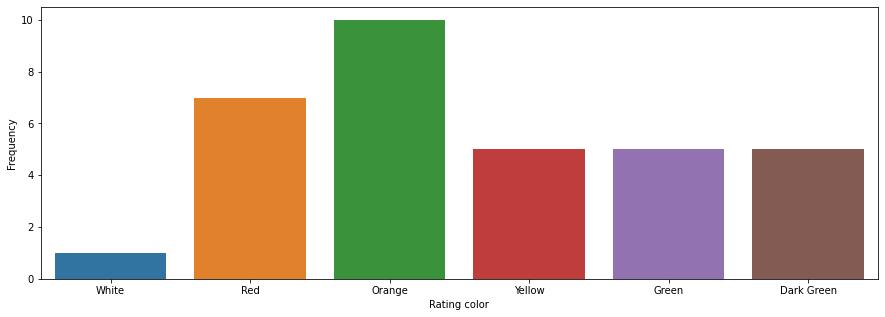

In [78]:
sns.countplot("Rating color", data=grouped_data )
plt.ylabel("Frequency")